In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

%matplotlib inline

# Using the requests library

In [2]:
url = 'https://rldaggie.github.io/sample-html/'
res = requests.get(url)

### Status Codes

In [3]:
res.status_code

200

In [4]:
res.content

b'<!DOCTYPE html>\n<html>\n  <head>\n    <meta charset="utf-8">\n    <title>The title</title>\n\n    <style media="screen">\n      tbody tr {\n        color: red;\n      }\n    </style>\n  </head>\n  <body>\n    <h1 class="foobar" id="title">This is an h1</h1>\n\n    <div>\n      <h1 class="foobar">This is yet another heading.</h1>\n\n      Something inside the div\n    </div>\n\n    <h3>Todo List</h3>\n    <ol class="todo">\n      <li class="foobar">Take out trash</li>\n      <li>Pay billz</li>\n      <li class="foobar">Feed dog</li>\n    </ol>\n\n    <h3>Completed</h3>\n    <ol class=\'done\'>\n      <li>Mow lawn</li>\n      <li class="foobar"><span>Take out compost</span></li>\n      <li><span>Create scraping lecture</span></li>\n    </ol>\n\n    <p class=\'foobar\'>Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commod

### Creating a `BeautifulSoup` object

In [5]:
soup = BeautifulSoup(res.content, 'lxml')

# `soup.find()`

Returns either:

1. A soup object of the first match
2. `None`

In [8]:
soup.find('h1').text

'This is an h1'

In [12]:
soup.find('h1').attrs

{'class': ['foobar'], 'id': 'title'}

In [14]:
soup.find('h1').attrs['class']

['foobar']

In [11]:
soup.find('h1', {'id': 'title'}).text

'This is an h1'

In [15]:
soup.find('h1', {'class': ['foobar']}).text

'This is an h1'

# `soup.find_all()`

Returns a **_LIST_** of soup objects that match your query

In [10]:
soup.find_all('h1')

[<h1 class="foobar" id="title">This is an h1</h1>,
 <h1 class="foobar">This is yet another heading.</h1>]

In [18]:
for item in soup.find_all('h1'):
    print(item)
# [text.text for text in soup.find_all('h1')] # as list comp

<h1 class="foobar" id="title">This is an h1</h1>
<h1 class="foobar">This is yet another heading.</h1>


# Creating a `pandas` DataFrame from a scrape

### Todo List

In [19]:
for li in soup.find_all('li'):
    print(li.text)

Take out trash
Pay billz
Feed dog
Mow lawn
Take out compost
Create scraping lecture
Home
About
Contact


In [21]:
todos = []

for ol in soup.find_all('ol'):
    for li in ol.find_all('li'):
        #print(li.text)
        todo = {}
        todo['Task'] = li.text # Make columns as such
        
        todos.append(todo) # Final thing is always the append
pd.DataFrame(todos)

,Task
0,Take out trash
1,Pay billz
2,Feed dog
3,Mow lawn
4,Take out compost
5,Create scraping lecture


### GA Directory

In [26]:
table = soup.find('table', {'id': 'directory'})

In [46]:
people = []

for row in table.find('tbody').find_all('tr'):
    person = {}
    person['Name'] = row.find('a').text.rstrip()
    person['Role'] = row.find('td').text.rstrip()
    person['Email'] = row.find('a').attrs['href'].replace('mailto:','')
    
    people.append(person)
pd.DataFrame(people)

,Email,Name,Role
0,praveen@ga.co,Praveen,Student
1,fred@ga.co,Fred,Student
2,homer@ga.co,Homer,Student
3,kyle@ga.co,Kyle,Student
4,sam@ga.co,Sam,Student
5,javier@ga.co,Javier,Student
6,nengkuan@ga.co,Nengkuan,Student
7,kieth@ga.co,Kieth,Student
8,bola@ga.co,Bola,Student
9,steve@ga.co,Steve,Student


### Basketball Reference

In [2]:
url = 'https://www.basketball-reference.com'
res = requests.get(url)

In [3]:
soup = BeautifulSoup(res.content, 'lxml')

In [4]:
teams = []

for conf in ['East', 'West']:
    table = soup.find('table', {'id': 'confs_standings_' + conf[0]})
    for row in table.find('tbody').find_all('tr'):
        team = {}
        team['Conference'] = conf
        team['Slug'] = row.find('a').text
        team['Name'] = row.find('a').attrs.get('title')
#        team['Rank'] = row.find('span').text.replace('(','').replace(')','')
        team['Rank'] = int(row.find('span').text.strip()[1:-1])
        team['Wins'] = int(row.find('td', {'data-stat':'wins'}).text)
        team['Losses'] = int(row.find('td', {'data-stat':'losses'}).text)
        
        teams.append(team)
df = pd.DataFrame(teams)

In [5]:
df.head()

,Conference,Losses,Name,Rank,Slug,Wins
0,East,23,Toronto Raptors,1,TOR,59
1,East,27,Boston Celtics,2,BOS,55
2,East,30,Philadelphia 76ers,3,PHI,52
3,East,32,Cleveland Cavaliers,4,CLE,50
4,East,34,Indiana Pacers,5,IND,48


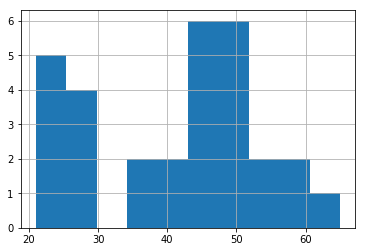

In [76]:
df['Wins'].hist();